# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [3]:
# Import pandas before creating the dataframe
import pandas as pd

# Create the dataframe
student_data = pd.DataFrame({
    'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
    'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
})

# Display the dataframe
student_data


,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

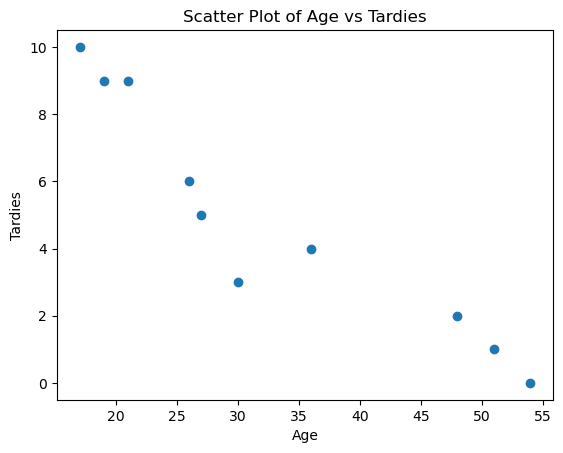

In [4]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(student_data['Age'], student_data['Tardies'])
plt.title('Scatter Plot of Age vs Tardies')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

# The scatter plot and correlation indicate a negative relationship between age and tardies.
# Hypothesis: Younger students tend to have more tardies compared to older students.


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Calculate covariance
covariance = student_data['Age'].cov(student_data['Tardies'])

# Calculate correlation
correlation = student_data['Age'].corr(student_data['Tardies'])

# Print results
covariance, correlation

# Comments:
# Covariance measures the direction of the relationship but is not standardized, so its magnitude depends on the scale of the data.
# Correlation is standardized, ranges between -1 and 1, and indicates both the strength and direction of the relationship.
# In this case, a negative correlation suggests an inverse relationship, where as age increases, tardies tend to decrease.


(-45.56666666666667, -0.9391626886887122)

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Define independent (Age) and dependent (Tardies) variables
X = np.array(student_data['Age']).reshape(-1, 1)
y = student_data['Tardies']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the model parameters
intercept = model.intercept_
slope = model.coef_[0]

# Print the model parameters
intercept, slope

# Comments:
# Outcome variable: 'Tardies' (dependent variable)
# Type of regression: Linear Regression (predicts the relationship between age and tardies)
# This model assumes a linear relationship between the two variables.


(12.888803363135771, -0.2428207709159809)

Plot your regression model on your scatter plot.

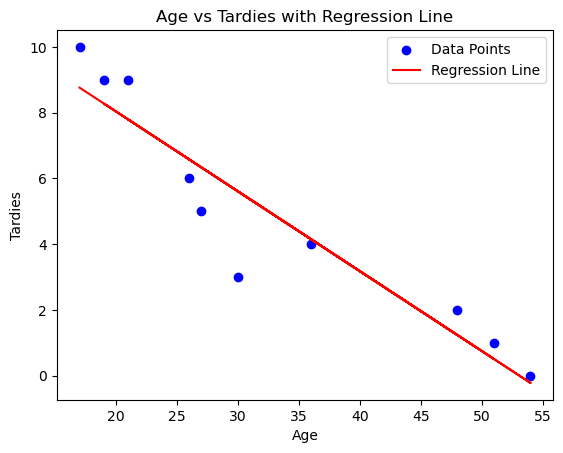

In [7]:
# Plot the scatter plot
plt.scatter(student_data['Age'], student_data['Tardies'], color='blue', label='Data Points')

# Plot the regression line
regression_line = model.predict(X)
plt.plot(student_data['Age'], regression_line, color='red', label='Regression Line')

# Add labels and legend
plt.title('Age vs Tardies with Regression Line')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.legend()
plt.show()


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [17]:
# Evaluate the model's performance using R-squared
r_squared = model.score(X, y)

# Print R-squared value
r_squared


0.9316696375519905

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [9]:
# Import any libraries you may need & the data
vehicles = pd.read_csv(r"C:\Users\harid\Downloads\vehicles (1).csv")

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [10]:
# Calculate correlations between the selected variables and the outcome variable
correlations = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']].corr()

# Extract correlations with 'CO2 Emission Grams/Mile'
co2_correlations = correlations['CO2 Emission Grams/Mile']

# Print correlations
co2_correlations

# Comments:
# Variables with the highest absolute correlation values are the most important for determining CO2 emissions.
# Variables with the lowest correlation values provide the least helpful information.
# Analyze the output to determine which variable has the strongest and weakest correlation with CO2 emissions.


Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define independent variables (X) and dependent variable (y)
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model's performance
r2 = r2_score(y_test, y_pred)

# Print R-squared value
r2

# Comments:
# Type of regression: Multiple Linear Regression (predicting CO2 emissions based on multiple independent variables)
# The R-squared value indicates the proportion of variance in CO2 emissions explained by the model.


0.9794542628636334

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [12]:
import statsmodels.api as sm

# Add a constant to the independent variables for the regression summary
X_train_sm = sm.add_constant(X_train)

# Create the OLS model and fit it
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Print the regression summary
print(ols_model.summary())

# Comments:
# - The coefficients indicate the impact of each independent variable on CO2 emissions.
# - Variables with larger absolute t-values and smaller p-values are more significant.
# - The R-squared value explains the proportion of variance in CO2 emissions explained by the model.
# - Confidence in conclusions depends on p-values and the overall model fit (R-squared and adjusted R-squared).


                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.005e+05
Date:                     Sun, 05 Jan 2025   Prob (F-statistic):               0.00
Time:                             23:31:47   Log-Likelihood:            -1.2113e+05
No. Observations:                    28761   AIC:                         2.423e+05
Df Residuals:                        28755   BIC:                         2.423e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [13]:
# Create the dataframe with the given data
data = pd.DataFrame({
    'X': [1, 3, 4, 6, 8, 9, 11, 14],
    'Y': [1, 2, 4, 4, 5, 7, 8, 13]
})

# Display the dataframe
data


,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

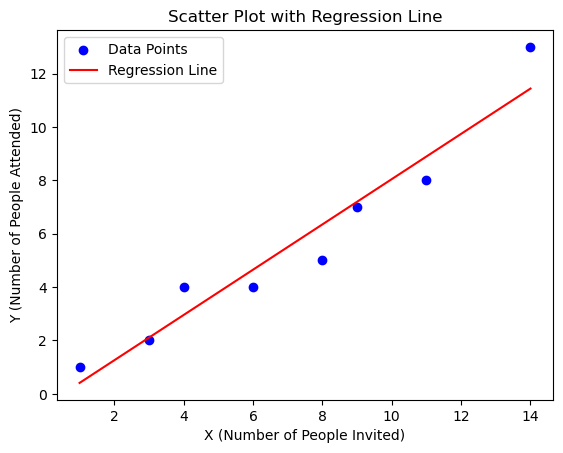

In [14]:
# Importing Linear Regression from sklearn
from sklearn.linear_model import LinearRegression
import numpy as np

# Define the independent (X) and dependent (Y) variables
X = np.array(data['X']).reshape(-1, 1)
y = data['Y']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the values for the regression line
y_pred = model.predict(X)

# Plot the scatter plot and regression line
plt.scatter(data['X'], data['Y'], color='blue', label='Data Points')
plt.plot(data['X'], y_pred, color='red', label='Regression Line')
plt.title('Scatter Plot with Regression Line')
plt.xlabel('X (Number of People Invited)')
plt.ylabel('Y (Number of People Attended)')
plt.legend()
plt.show()


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [15]:
# Print the slope and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

# Print the results
slope, intercept

(0.8484848484848482, -0.43939393939393767)

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

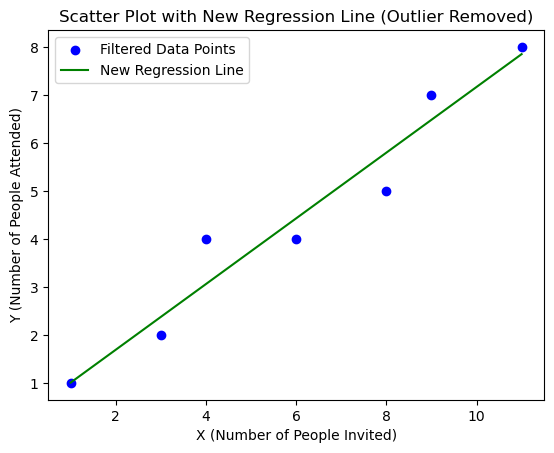

(0.6842105263157895, 0.32330827067669166)

In [16]:
# Identify and remove the outlier
# Let's assume the point (14, 13) is an outlier based on visual inspection
filtered_data = data[data['X'] != 14]

# Redefine the independent (X) and dependent (Y) variables
X_filtered = np.array(filtered_data['X']).reshape(-1, 1)
y_filtered = filtered_data['Y']

# Create and fit a new linear regression model
new_model = LinearRegression()
new_model.fit(X_filtered, y_filtered)

# Predict the values for the new regression line
y_filtered_pred = new_model.predict(X_filtered)

# Plot the scatter plot and new regression line
plt.scatter(filtered_data['X'], filtered_data['Y'], color='blue', label='Filtered Data Points')
plt.plot(filtered_data['X'], y_filtered_pred, color='green', label='New Regression Line')
plt.title('Scatter Plot with New Regression Line (Outlier Removed)')
plt.xlabel('X (Number of People Invited)')
plt.ylabel('Y (Number of People Attended)')
plt.legend()
plt.show()

# Print the new slope and intercept
new_slope = new_model.coef_[0]
new_intercept = new_model.intercept_
new_slope, new_intercept


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?